In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import random
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [11]:
# import os
# import shutil

# def mover_imagens_para_pasta_raiz(dataset_path):
#     for classe in os.listdir(dataset_path):
#         classe_path = os.path.join(dataset_path, classe)

#         # Pular se não for pasta
#         if not os.path.isdir(classe_path):
#             continue

#         for raiz, subdirs, arquivos in os.walk(classe_path):
#             for arquivo in arquivos:
#                 if arquivo.lower().endswith(('.jpg', '.jpeg', '.png')):
#                     origem = os.path.join(raiz, arquivo)
#                     destino = os.path.join(classe_path, arquivo)

#                     # Evitar sobrescrever se nome repetir
#                     base, ext = os.path.splitext(arquivo)
#                     contador = 1
#                     while os.path.exists(destino):
#                         destino = os.path.join(classe_path, f"{base}_{contador}{ext}")
#                         contador += 1

#                     shutil.copy2(origem, destino)

#     print("✅ Imagens copiadas para o nível da classe com sucesso!")

# # Use o caminho onde estão as classes
# mover_imagens_para_pasta_raiz("camaroes_dataset")


**Separando dataset**

In [12]:
import os
import shutil
import random
import cv2 as cv
# Caminhos
original_dataset = "camaroes_dataset/images"
destino_base = "camaroes_dataset_split"
train_path = os.path.join(destino_base, "train")
test_path = os.path.join(destino_base, "test")
external_path = os.path.join(destino_base, "external")
split_train = 0.7
split_test = 0.2
split_external = 0.1  # 10% para avaliação final


# Extensões permitidas
extensoes_validas = (".jpg", ".jpeg", ".png", ".bmp")

# Cria diretórios de saída
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(external_path, exist_ok=True)

# Para cada classe no dataset
for classe in os.listdir(original_dataset):
    classe_path = os.path.join(original_dataset, classe)
    print(classe_path)
    if not os.path.isdir(classe_path):
        continue

    imagens = [f for f in os.listdir(classe_path) if f.lower().endswith(extensoes_validas)]
    random.shuffle(imagens)

    total = len(imagens)
    train_end = int(total * split_train)
    test_end = train_end + int(total * split_test)

    imagens_train = imagens[:train_end]
    imagens_test = imagens[train_end:test_end]
    imagens_external = imagens[test_end:]

    # Criar diretórios de saída por classe
    os.makedirs(os.path.join(train_path, classe), exist_ok=True)
    os.makedirs(os.path.join(test_path, classe), exist_ok=True)
    os.makedirs(os.path.join(external_path, classe), exist_ok=True)

    # Copiar imagens de treino
    for img in imagens_train:
        img_gray = cv.imread(os.path.join(classe_path, img))
        img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)
        src = os.path.join(classe_path, img)
        dst = os.path.join(train_path, classe, img)
        try:
            cv.imwrite(os.path.join(train_path, classe, img), img_gray)
        except Exception as e:
            print(f"Erro ao copiar {src}: {e}")

    # Copiar imagens de teste
    for img in imagens_test:
        img_gray = cv.imread(os.path.join(classe_path, img))
        img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)
        src = os.path.join(classe_path, img)
        try:
            cv.imwrite(os.path.join(test_path, classe, img), img_gray)
        except Exception as e:
            print(f"Erro ao copiar {src}: {e}")

    # Copiar imagens externas
    for img in imagens_external:
        img_gray = cv.imread(os.path.join(classe_path, img))
        img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)
        src = os.path.join(classe_path, img)
        try:
            cv.imwrite(os.path.join(external_path, classe, img), img_gray)
        except Exception as e:
            print(f"Erro ao copiar {src}: {e}")

print("✅ Imagens divididas em treino, teste e conjunto externo com sucesso!")


camaroes_dataset/images\XB
camaroes_dataset/images\XD
camaroes_dataset/images\XK
✅ Imagens divididas em treino, teste e conjunto externo com sucesso!


**Treinamento do modelo ResNet18**

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1, Loss: 0.8695076167583465
Época 2, Loss: 0.27753268331289294
Época 3, Loss: 0.08753506131470204
Época 4, Loss: 0.06704652644693851
Época 5, Loss: 0.02275913832709193
Época 6, Loss: 0.01189259933307767
Época 7, Loss: 0.009142525889910758
Época 8, Loss: 0.0041374156950041655
Época 9, Loss: 0.006109298043884337
Época 10, Loss: 0.006217700033448637
✅ Acurácia no teste após época 10: 85.71%

📊 Acurácia final: 85.71%
🎯 F1-score macro: 0.83
🎯 F1-score weighted: 0.86

=== Classification Report ===
              precision    recall  f1-score   support

          XB       1.00      0.67      0.80         6
          XD       0.78      0.78      0.78        27
          XK       0.89      0.92      0.90        51

    accuracy                           0.86        84
   macro avg       0.89      0.79      0.83        84
weighted avg       0.86      0.86      0.86        84



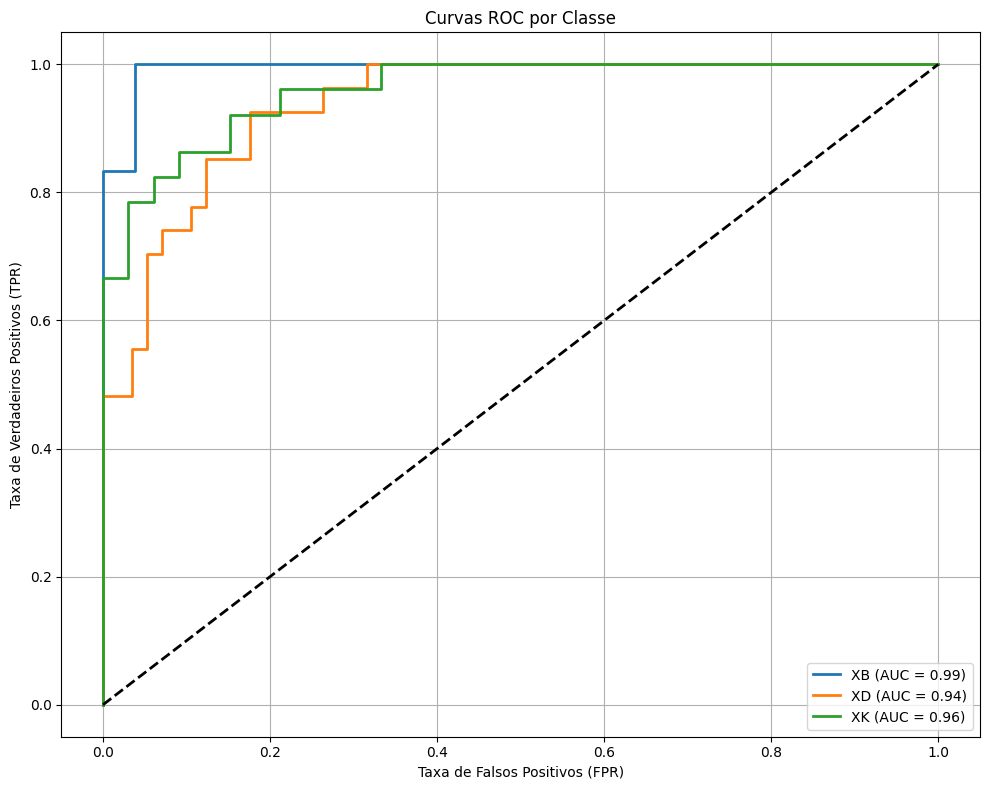

In [13]:
train_losses = []
test_accuracies = []

# =======================
# 1. CONFIGURAÇÕES
# =======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 10
data_dir = "camaroes_dataset_split"  # Caminho para dataset com train/ e test/

# =======================
# 2. TRANSFORMAÇÕES
# =======================
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Todas as redes esperam 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Padrão ImageNet
                         std=[0.229, 0.224, 0.225])
])

# =======================
# 3. DATALOADERS
# =======================
generator = torch.Generator().manual_seed(SEED)
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, generator=generator)

num_classes = len(train_dataset.classes)
class_names = train_dataset.classes

# =======================
# 4. MODELO (troque aqui)
# =======================
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Para ResNet18

model = model.to(device)

# =======================
# 5. LOSS E OTIMIZADOR
# =======================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# =======================
# 6. TREINAMENTO
# =======================
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Época {epoch+1}, Loss: {running_loss / len(train_loader)}")

    train_losses.append(running_loss / len(train_loader))

# =======================
# 7. AVALIAÇÃO NO TESTE
# =======================
model.eval()
correct = 0
total = 0

all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Armazena previsões e rótulos verdadeiros
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        all_probs.extend(probs)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Acurácia final
        acc = 100 * correct / total
        test_accuracies.append(acc)
    print(f"✅ Acurácia no teste após época {epoch+1}: {acc:.2f}%")

# === Relatório e Matriz de Confusão ===
print(f"\n📊 Acurácia final: {accuracy_score(all_labels, all_preds)*100:.2f}%")
print(f"🎯 F1-score macro: {f1_score(all_labels, all_preds, average='macro'):.2f}")
print(f"🎯 F1-score weighted: {f1_score(all_labels, all_preds, average='weighted'):.2f}")

print("\n=== Classification Report ===")
print(classification_report(all_labels, all_preds, target_names=class_names))

# One-hot encoding dos rótulos verdadeiros
y_true = label_binarize(all_labels, classes=list(range(num_classes)))
y_score = np.array(all_probs)

# Plotar curva ROC para cada classe
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC por Classe')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

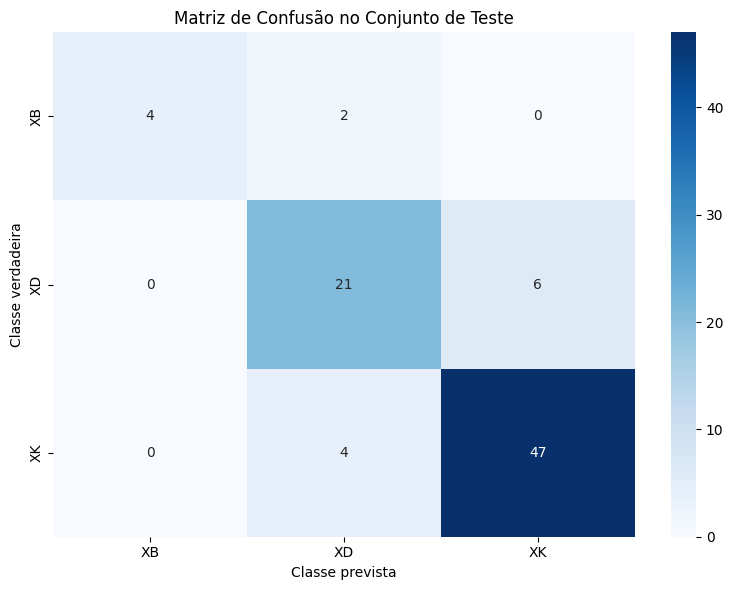

In [14]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.tight_layout()
plt.show()


In [15]:
torch.save(model.state_dict(), './models_gray/modelo_final_res_net.pth')

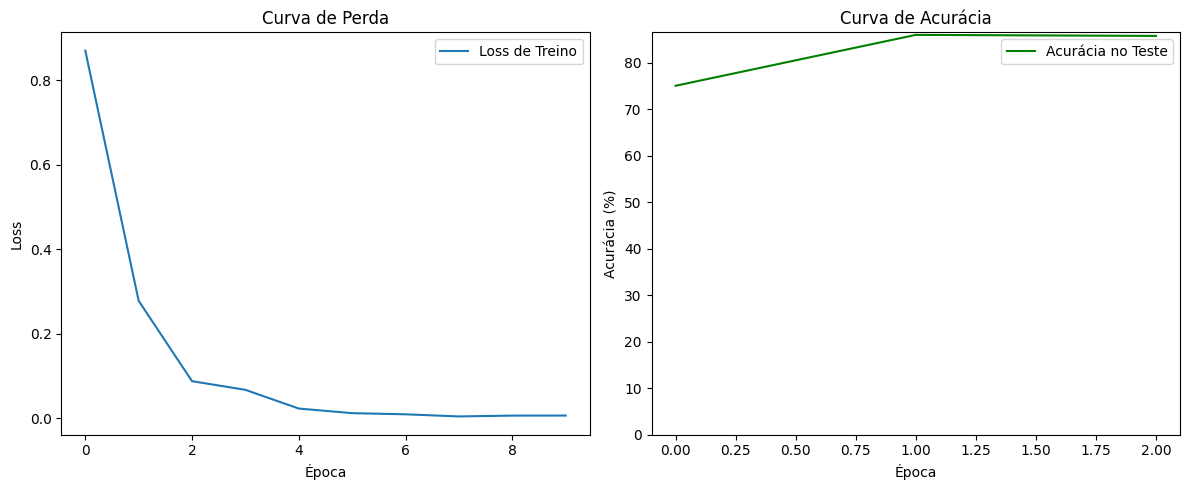

In [16]:
# Plotar curva de perda
plt.figure(figsize=(12, 5))
# plt.title("Evolução da Perda e Acurácia Durante o Treinamento")

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss de Treino')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Perda')
plt.legend()

# Plotar curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Acurácia no Teste', color='green')
plt.xlabel('Época')
plt.ylabel('Acurácia (%)')
plt.title('Curva de Acurácia')
plt.legend()
plt.ylim(bottom=0)  

plt.tight_layout()
plt.show()


**AlexNet Treinamento**

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1, Loss: 0.8730146527290344
Época 2, Loss: 0.6231968343257904
Época 3, Loss: 0.4675635129213333
Época 4, Loss: 0.31637365445494653
Época 5, Loss: 0.12769808182492853
Época 6, Loss: 0.07347845956683159
Época 7, Loss: 0.07365419734269381
Época 8, Loss: 0.04454803564585745
Época 9, Loss: 0.021316711558029056
Época 10, Loss: 0.011329704523086548
✅ Acurácia no teste após época 10: 79.76%

📊 Acurácia final: 79.76%
🎯 F1-score macro: 0.78
🎯 F1-score weighted: 0.79

=== Classification Report ===
              precision    recall  f1-score   support

          XB       1.00      0.67      0.80         6
          XD       0.71      0.63      0.67        27
          XK       0.82      0.90      0.86        51

    accuracy                           0.80        84
   macro avg       0.84      0.73      0.78        84
weighted avg       0.80      0.80      0.79        84



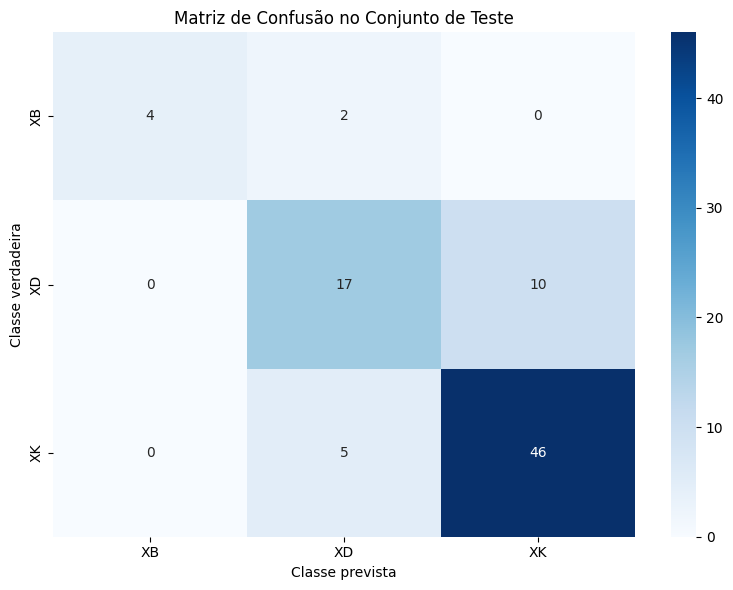

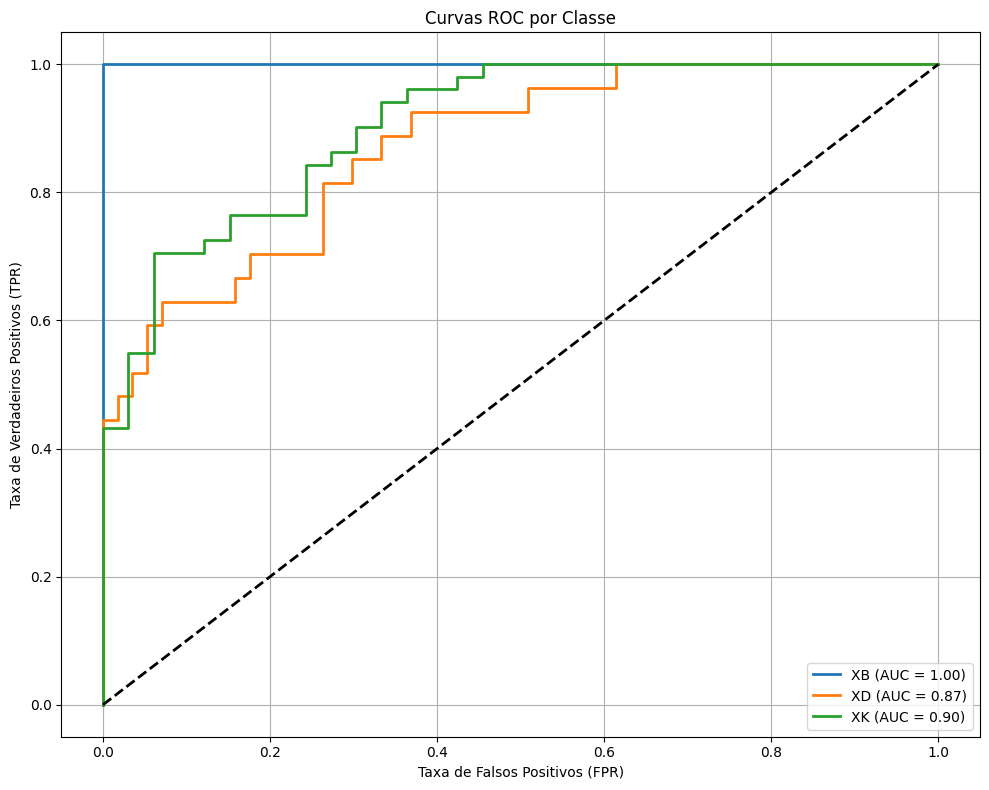

In [17]:

train_losses = []
test_accuracies = []

# =======================
# 1. CONFIGURAÇÕES
# =======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 10
data_dir = "camaroes_dataset_split"  # Caminho para dataset com train/ e test/

# =======================
# 2. TRANSFORMAÇÕES
# =======================
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Todas as redes esperam 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Padrão ImageNet
                         std=[0.229, 0.224, 0.225])
])

# =======================
# 3. DATALOADERS
# =======================
generator = torch.Generator().manual_seed(SEED)
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, generator=generator)

num_classes = len(train_dataset.classes)
class_names = train_dataset.classes

# =======================
# 4. MODELO
# =======================

model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

model = model.to(device)

# =======================
# 5. LOSS E OTIMIZADOR
# =======================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# =======================
# 6. TREINAMENTO
# =======================
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Época {epoch+1}, Loss: {running_loss / len(train_loader)}")

    train_losses.append(running_loss / len(train_loader))

# =======================
# 7. AVALIAÇÃO NO TESTE
# =======================
model.eval()
correct = 0
total = 0

all_preds = []
all_labels = []
all_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Armazena previsões e rótulos verdadeiros
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        all_probs.extend(probs)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Acurácia final
        acc = 100 * correct / total
        test_accuracies.append(acc)
    print(f"✅ Acurácia no teste após época {epoch+1}: {acc:.2f}%")

# === Relatório e Matriz de Confusão ===

print(f"\n📊 Acurácia final: {accuracy_score(all_labels, all_preds)*100:.2f}%")
print(f"🎯 F1-score macro: {f1_score(all_labels, all_preds, average='macro'):.2f}")
print(f"🎯 F1-score weighted: {f1_score(all_labels, all_preds, average='weighted'):.2f}")

print("\n=== Classification Report ===")
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.tight_layout()
plt.show()


# One-hot encoding dos rótulos verdadeiros
y_true = label_binarize(all_labels, classes=list(range(num_classes)))
y_score = np.array(all_probs)

# Plotar curva ROC para cada classe
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC por Classe')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
torch.save(model.state_dict(), './models_gray/modelo_final_alex_net.pth')

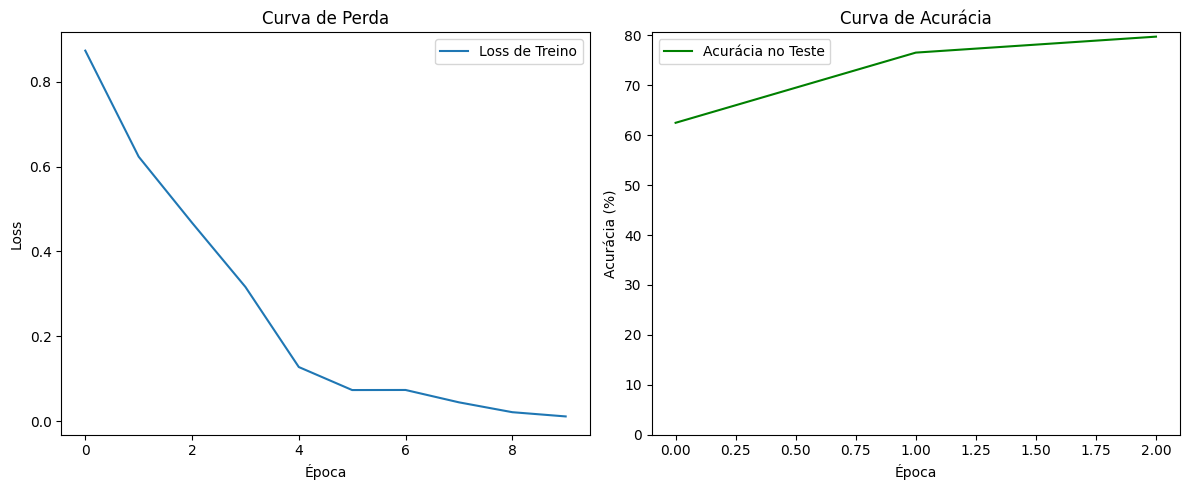

In [19]:
# Plotar curva de perda
plt.figure(figsize=(12, 5))
# plt.title("Evolução da Perda e Acurácia Durante o Treinamento")

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss de Treino')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Perda')
plt.legend()

# Plotar curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Acurácia no Teste', color='green')
plt.xlabel('Época')
plt.ylabel('Acurácia (%)')
plt.title('Curva de Acurácia')
plt.legend()
plt.ylim(bottom=0)  

plt.tight_layout()
plt.show()

**MobileNetV2 Treinamento**

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1, Loss: 0.8536086678504944
Época 2, Loss: 0.44405471831560134
Época 3, Loss: 0.24857145100831984
Época 4, Loss: 0.08011382780969142
Época 5, Loss: 0.08074797205626964
Época 6, Loss: 0.02686897963285446
Época 7, Loss: 0.06776842176914215
Época 8, Loss: 0.046061249915510416
Época 9, Loss: 0.031345964223146436
Época 10, Loss: 0.06150011131539941
✅ Acurácia no teste após época 10: 86.90%

📊 Acurácia final: 86.90%
🎯 F1-score macro: 0.87
🎯 F1-score weighted: 0.87

=== Classification Report ===
              precision    recall  f1-score   support

          XB       1.00      0.83      0.91         6
          XD       0.90      0.70      0.79        27
          XK       0.84      0.96      0.90        51

    accuracy                           0.87        84
   macro avg       0.92      0.83      0.87        84
weighted avg       0.88      0.87      0.87        84



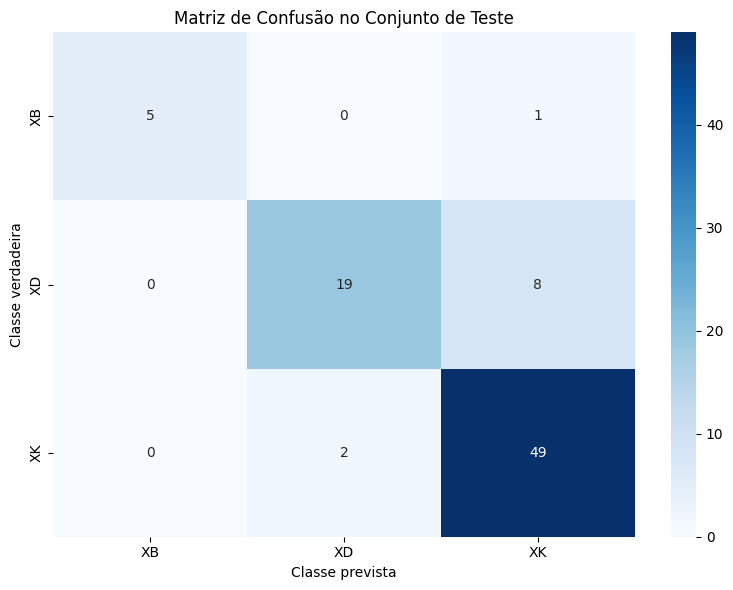

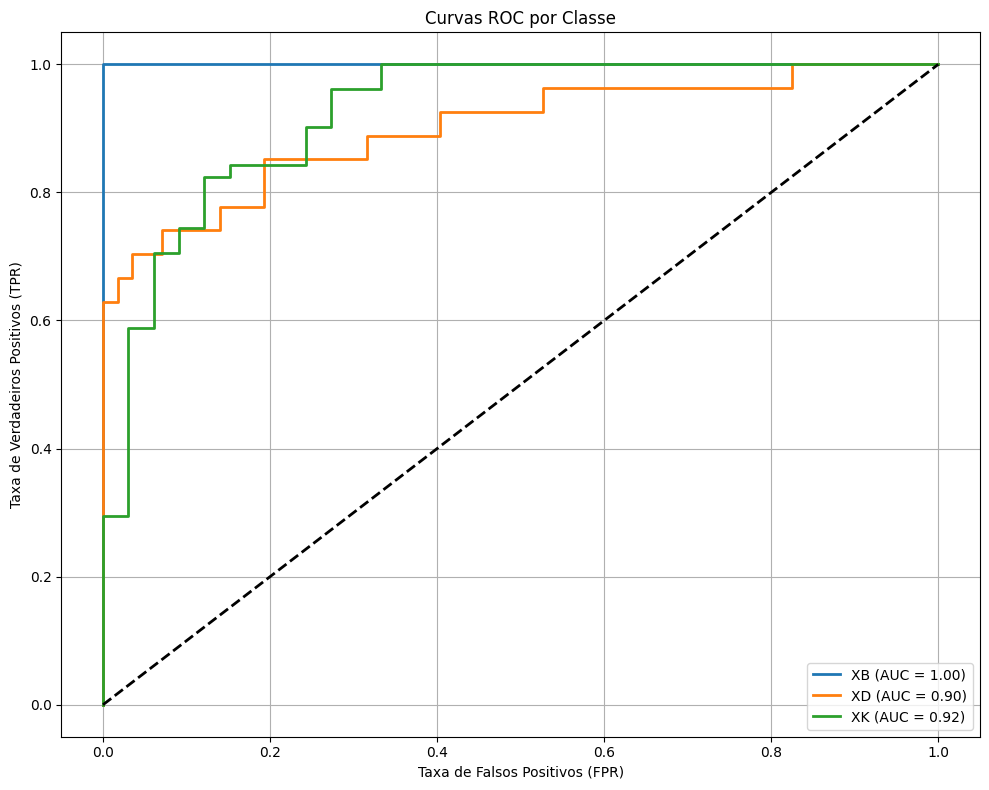

In [20]:

train_losses = []
test_accuracies = []

# =======================
# 1. CONFIGURAÇÕES
# =======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 10
data_dir = "camaroes_dataset_split"  # Caminho para dataset com train/ e test/

# =======================
# 2. TRANSFORMAÇÕES
# =======================
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Todas as redes esperam 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Padrão ImageNet
                         std=[0.229, 0.224, 0.225])
])

# =======================
# 3. DATALOADERS
# =======================
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(train_dataset.classes)

# =======================
# 4. MODELO
# =======================

model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

model = model.to(device)

# =======================
# 5. LOSS E OTIMIZADOR
# =======================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# =======================
# 6. TREINAMENTO
# =======================
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Época {epoch+1}, Loss: {running_loss / len(train_loader)}")

    train_losses.append(running_loss / len(train_loader))

# =======================
# 7. AVALIAÇÃO NO TESTE
# =======================
model.eval()
correct = 0
total = 0

all_preds = []
all_labels = []
all_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Armazena previsões e rótulos verdadeiros
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        all_probs.extend(probs)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Acurácia final
        acc = 100 * correct / total
        test_accuracies.append(acc)
    print(f"✅ Acurácia no teste após época {epoch+1}: {acc:.2f}%")

# === Relatório e Matriz de Confusão ===
class_names = train_dataset.classes

print(f"\n📊 Acurácia final: {accuracy_score(all_labels, all_preds)*100:.2f}%")
print(f"🎯 F1-score macro: {f1_score(all_labels, all_preds, average='macro'):.2f}")
print(f"🎯 F1-score weighted: {f1_score(all_labels, all_preds, average='weighted'):.2f}")

print("\n=== Classification Report ===")
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.tight_layout()
plt.show()

# One-hot encoding dos rótulos verdadeiros
y_true = label_binarize(all_labels, classes=list(range(num_classes)))
y_score = np.array(all_probs)

# Plotar curva ROC para cada classe
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC por Classe')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
torch.save(model.state_dict(), './models_gray/modelo_final_mobile_net.pth')

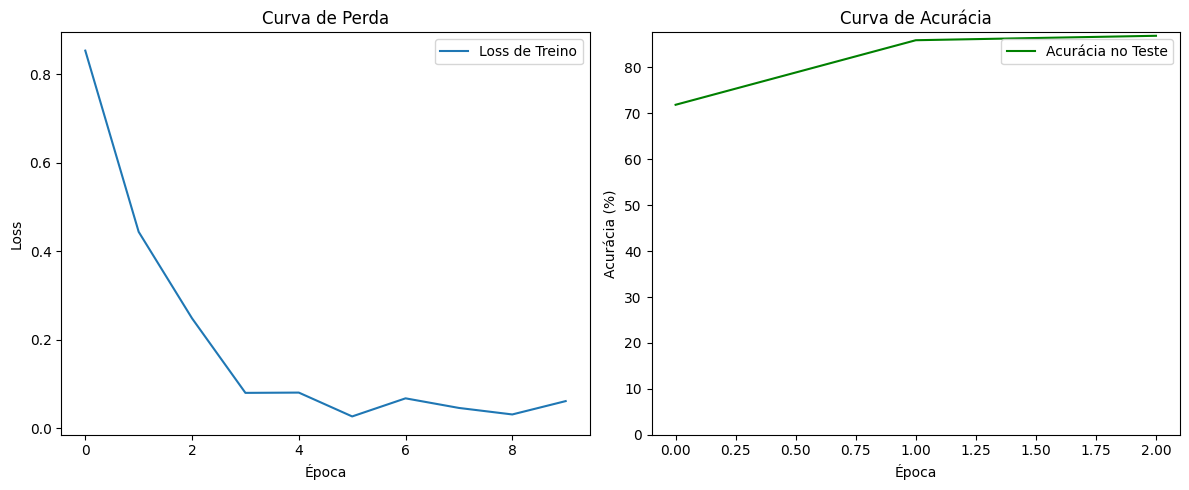

In [22]:
# Plotar curva de perda
plt.figure(figsize=(12, 5))
# plt.title("Evolução da Perda e Acurácia Durante o Treinamento")
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss de Treino')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Perda')
plt.legend()

# Plotar curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Acurácia no Teste', color='green')
plt.xlabel('Época')
plt.ylabel('Acurácia (%)')
plt.title('Curva de Acurácia')
plt.legend()
plt.ylim(bottom=0)  

plt.tight_layout()
plt.show()

**ResNet avaliação**

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


=== Classification Report ===
              precision    recall  f1-score   support

          XB       0.50      1.00      0.67         3
          XD       0.69      0.64      0.67        14
          XK       0.88      0.81      0.85        27

    accuracy                           0.77        44
   macro avg       0.69      0.82      0.73        44
weighted avg       0.79      0.77      0.78        44

=== Matriz de Confusão ===


C:\Users\vitin\AppData\Local\Temp\ipykernel_20368\893438013.py:59: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


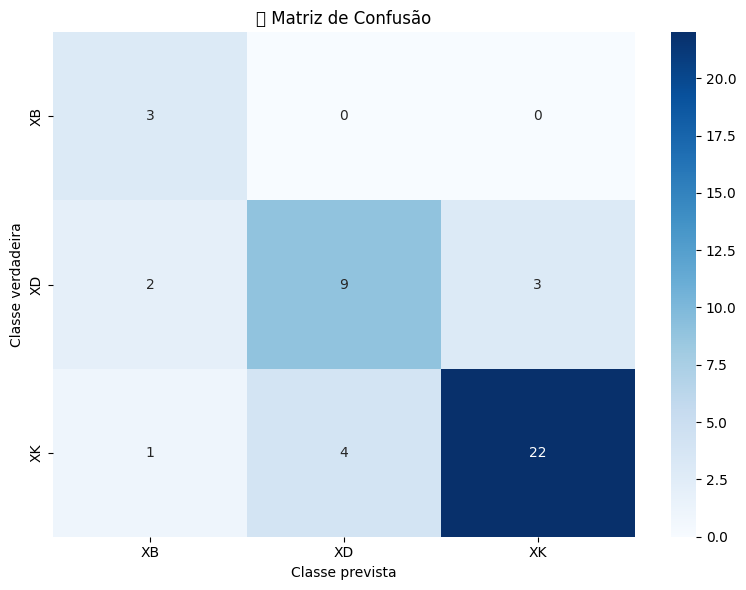

In [23]:
import torch
import os
from PIL import Image
from torchvision import transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# === CONFIGURAÇÕES ===
caminho_dataset = 'camaroes_dataset_split/external'
classes = sorted(os.listdir(caminho_dataset))  # os nomes das pastas são os nomes das classes
class_to_idx = {classe: idx for idx, classe in enumerate(classes)}
caminho_modelo = './models_gray/modelo_final_res_net.pth'  # Caminho para o modelo treinado

# === TRANSFORMAÇÕES ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === CARREGAR MODELO ===
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, len(classes))
model.load_state_dict(torch.load(caminho_modelo, map_location='cpu'))
model.eval()

# === AVALIAÇÃO ===
y_true = []
y_pred = []

for classe in classes:
    pasta_classe = os.path.join(caminho_dataset, classe)
    for img_nome in os.listdir(pasta_classe):
        if not img_nome.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            continue
        img_path = os.path.join(pasta_classe, img_nome)
        img = Image.open(img_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0)

        with torch.no_grad():
            output = model(img_tensor)
            _, pred = torch.max(output, 1)

        y_true.append(class_to_idx[classe])
        y_pred.append(pred.item())

# === RELATÓRIO ===
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=classes))

print("=== Matriz de Confusão ===")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("🔍 Matriz de Confusão")
plt.tight_layout()
plt.show()


**Avalição do Modelo AlexNet**

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


=== Classification Report ===
              precision    recall  f1-score   support

          XB       0.75      1.00      0.86         3
          XD       0.62      0.57      0.59        14
          XK       0.81      0.81      0.81        27

    accuracy                           0.75        44
   macro avg       0.73      0.80      0.75        44
weighted avg       0.75      0.75      0.75        44

=== Matriz de Confusão ===


C:\Users\vitin\AppData\Local\Temp\ipykernel_20368\231474395.py:59: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


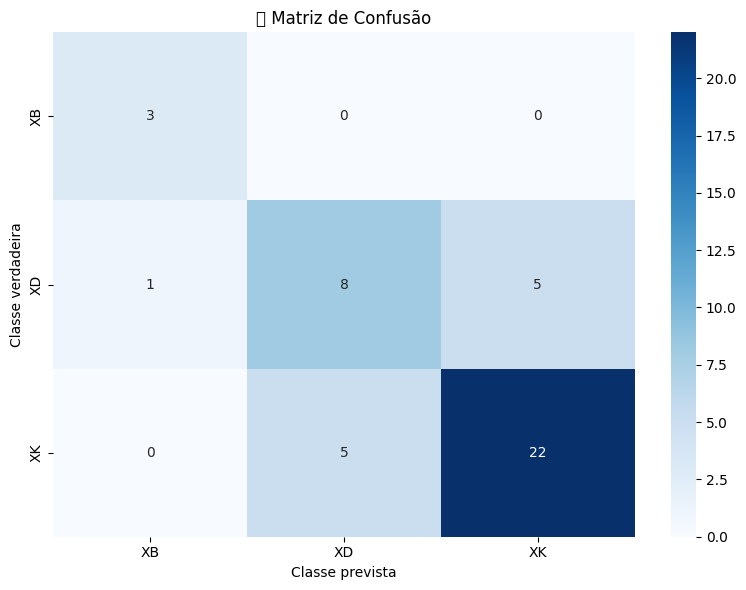

In [24]:
import torch
import os
from PIL import Image
from torchvision import transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# === CONFIGURAÇÕES ===
caminho_dataset = 'camaroes_dataset_split/external'
classes = sorted(os.listdir(caminho_dataset))  # os nomes das pastas são os nomes das classes
class_to_idx = {classe: idx for idx, classe in enumerate(classes)}
caminho_modelo = './models_gray/modelo_final_alex_net.pth'  # Caminho para o modelo treinado

# === TRANSFORMAÇÕES ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === CARREGAR MODELO ===
model = models.alexnet(pretrained=False)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, len(classes))
model.load_state_dict(torch.load(caminho_modelo, map_location='cpu'))
model.eval()

# === AVALIAÇÃO ===
y_true = []
y_pred = []

for classe in classes:
    pasta_classe = os.path.join(caminho_dataset, classe)
    for img_nome in os.listdir(pasta_classe):
        if not img_nome.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            continue
        img_path = os.path.join(pasta_classe, img_nome)
        img = Image.open(img_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0)

        with torch.no_grad():
            output = model(img_tensor)
            _, pred = torch.max(output, 1)

        y_true.append(class_to_idx[classe])
        y_pred.append(pred.item())

# === RELATÓRIO ===
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=classes))

print("=== Matriz de Confusão ===")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("🔍 Matriz de Confusão")
plt.tight_layout()
plt.show()

**Avaliação do modelo MobileNetV2**

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


=== Classification Report ===
              precision    recall  f1-score   support

          XB       0.50      0.67      0.57         3
          XD       0.80      0.29      0.42        14
          XK       0.71      0.93      0.81        27

    accuracy                           0.70        44
   macro avg       0.67      0.63      0.60        44
weighted avg       0.73      0.70      0.67        44

=== Matriz de Confusão ===


C:\Users\vitin\AppData\Local\Temp\ipykernel_20368\1114222817.py:60: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


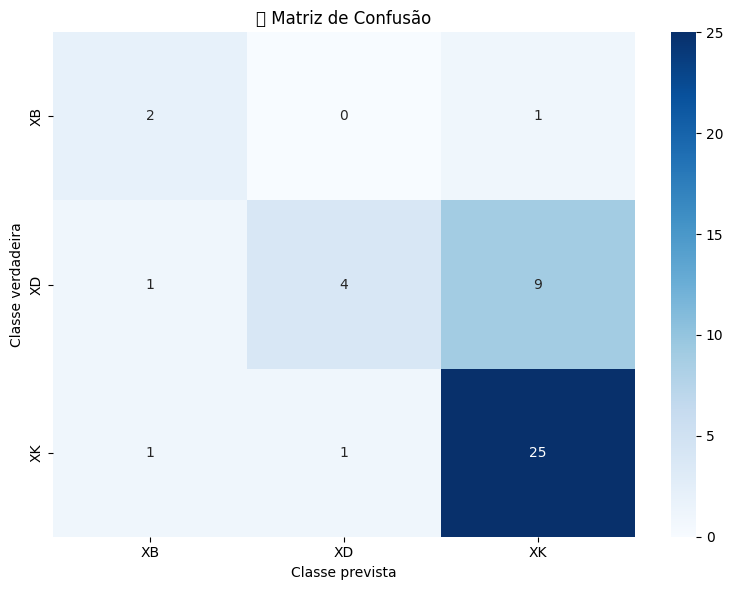

In [25]:
import torch
import os
from PIL import Image
from torchvision import transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# === CONFIGURAÇÕES ===
caminho_dataset = 'camaroes_dataset_split/external'
classes = sorted(os.listdir(caminho_dataset))  # os nomes das pastas são os nomes das classes
class_to_idx = {classe: idx for idx, classe in enumerate(classes)}
caminho_modelo = './models_gray/modelo_final_mobile_net.pth'  # Caminho para o modelo treinado

# === TRANSFORMAÇÕES ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === CARREGAR MODELO ===
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.last_channel, len(classes))
model.load_state_dict(torch.load(caminho_modelo, map_location='cpu'))
model.eval()


# === AVALIAÇÃO ===
y_true = []
y_pred = []

for classe in classes:
    pasta_classe = os.path.join(caminho_dataset, classe)
    for img_nome in os.listdir(pasta_classe):
        if not img_nome.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            continue
        img_path = os.path.join(pasta_classe, img_nome)
        img = Image.open(img_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0)

        with torch.no_grad():
            output = model(img_tensor)
            _, pred = torch.max(output, 1)

        y_true.append(class_to_idx[classe])
        y_pred.append(pred.item())

# === RELATÓRIO ===
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=classes))

print("=== Matriz de Confusão ===")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("🔍 Matriz de Confusão")
plt.tight_layout()
plt.show()

c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


XBPA004_sem_fundo.png
IMG_0124_sem_fundo.png
IMG_0152_sem_fundo.png


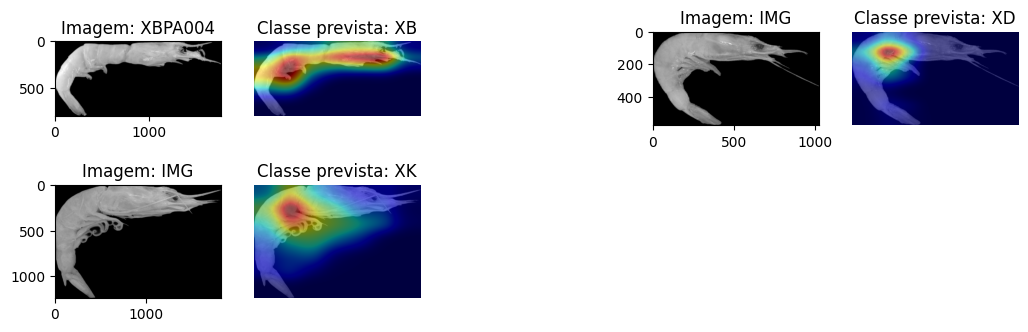

In [10]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image

# === CONFIGURAÇÕES ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo_path = "./models_gray/modelo_final_res_net.pth"
caminho_dataset = 'camaroes_dataset_split/external'
classes = sorted(os.listdir(caminho_dataset))

# === TRANSFORMAÇÕES ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === CARREGAR MODELO ===
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, len(classes))
model.load_state_dict(torch.load(modelo_path, map_location=device))
model.to(device)
model.eval()

plt.figure(figsize=(15, 6))
cont = 0
for idx, classe in enumerate(classes):
    pasta_classe = os.path.join(caminho_dataset, classe)
    img_nome =  os.listdir(pasta_classe)[1]

    if not img_nome.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        continue

    #  === CARREGAR IMAGEM ===
    img_path = os.path.join(pasta_classe, img_nome)
    img = Image.open(img_path).convert('RGB')
    
    img_tensor = transform(img).unsqueeze(0)

    output = model(img_tensor)
    _, pred = torch.max(output, 1)

    # === APLICAR Grad-CAM ===
    cam_extractor = GradCAM(model, target_layer='layer4')

    output = model(img_tensor)
    pred_class = output.argmax().item()

    # Extrair ativação e sobrepor com imagem original
    activation_map = cam_extractor(pred_class, output)[0].cpu()

    # Converter imagem e ativação para PIL
    activation_pil = to_pil_image(activation_map, mode='F')

    # Gerar imagem com sobreposição (mapa de calor)
    result = overlay_mask(img, activation_pil, alpha=0.5)
    print(img_nome)
    # Mostrar com matplotlib
    img_nome = img_nome.split('_')[0]
    cont+=1
    plt.subplot(3,6, idx + cont)
    plt.title(f"Imagem: {img_nome}")
    plt.imshow(img)
    cont+=1
    plt.subplot(3,6, idx + cont)
    plt.axis("off")
    plt.imshow(result)
    plt.title(f"Classe prevista: {classes[pred_class]}")
    plt.axis("off")
plt.show()


c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vitin\Documents\LABEEC\camarao\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


camaroes_dataset_split/external\XB
camaroes_dataset_split/external\XB\XBPA004_sem_fundo.png
camaroes_dataset_split/external\XD
camaroes_dataset_split/external\XD\IMG_0124_sem_fundo.png
camaroes_dataset_split/external\XK
camaroes_dataset_split/external\XK\IMG_0152_sem_fundo.png


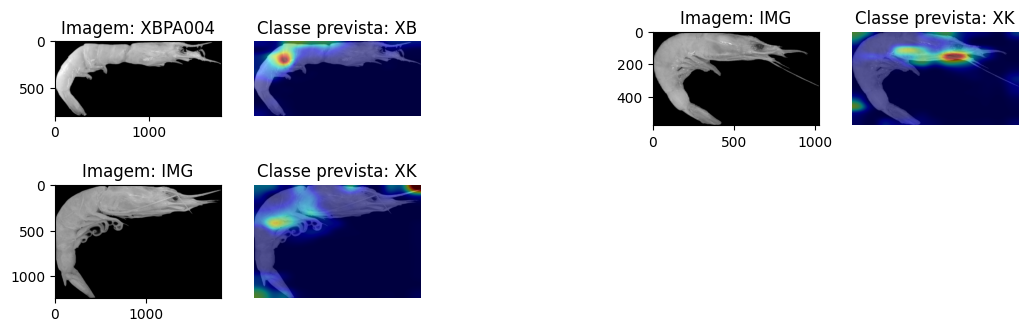

In [ ]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image

# === CONFIGURAÇÕES ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo_path = "./models_gray/modelo_final_alex_net.pth"
caminho_dataset = 'camaroes_dataset_split/external'
classes = sorted(os.listdir(caminho_dataset))

# === TRANSFORMAÇÕES ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === CARREGAR MODELO ===
model = models.alexnet(pretrained=False)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, len(classes))
model.load_state_dict(torch.load(modelo_path, map_location='cpu'))
model.eval()

plt.figure(figsize=(15, 6))
cont = 0
for idx, classe in enumerate(classes):
    pasta_classe = os.path.join(caminho_dataset, classe)
    img_nome =  os.listdir(pasta_classe)[0]

    if not img_nome.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        continue

    #  === CARREGAR IMAGEM ===
    img_path = os.path.join(pasta_classe, img_nome)
    img = Image.open(img_path).convert('RGB')
    
    img_tensor = transform(img).unsqueeze(0)

    output = model(img_tensor)
    _, pred = torch.max(output, 1)

    # === APLICAR Grad-CAM ===
    cam_extractor = GradCAM(model, target_layer='features.11')

    output = model(img_tensor)
    pred_class = output.argmax().item()

    # Extrair ativação e sobrepor com imagem original
    activation_map = cam_extractor(pred_class, output)[0].cpu()

    # Converter imagem e ativação para PIL
    activation_pil = to_pil_image(activation_map, mode='F')

    # Gerar imagem com sobreposição (mapa de calor)
    result = overlay_mask(img, activation_pil, alpha=0.5)

    # Mostrar com matplotlib
    img_nome = img_nome.split('_')[0]
    cont+=1
    plt.subplot(3,6, idx + cont)
    plt.title(f"Imagem: {img_nome}")
    plt.imshow(img)
    cont+=1
    plt.subplot(3,6, idx + cont)
    plt.axis("off")
    plt.imshow(result)
    plt.title(f"Classe prevista: {classes[pred_class]}")
    plt.axis("off")
plt.show()


XBPA001_sem_fundo.png
IMG_0114_sem_fundo.png
IMG_0148_sem_fundo.png


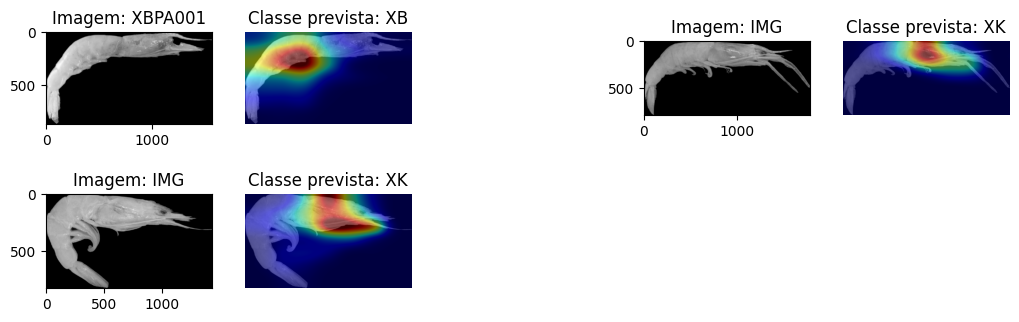

In [ ]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image

# === CONFIGURAÇÕES ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo_path = "./models_gray/modelo_final_mobile_net.pth"
caminho_dataset = 'camaroes_dataset_split/external'
classes = sorted(os.listdir(caminho_dataset))

# === TRANSFORMAÇÕES ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === CARREGAR MODELO ===
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.last_channel, len(classes))
model.load_state_dict(torch.load(modelo_path, map_location='cpu'))
model.eval()

plt.figure(figsize=(15, 6))
cont = 0
for idx, classe in enumerate(classes):
    pasta_classe = os.path.join(caminho_dataset, classe)
    img_nome =  os.listdir(pasta_classe)[0]

    if not img_nome.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        continue

    #  === CARREGAR IMAGEM ===
    img_path = os.path.join(pasta_classe, img_nome)
    img = Image.open(img_path).convert('RGB')
    
    img_tensor = transform(img).unsqueeze(0)

    output = model(img_tensor)
    _, pred = torch.max(output, 1)

    # === APLICAR Grad-CAM ===
    cam_extractor = GradCAM(model, target_layer='features.18')

    output = model(img_tensor)
    pred_class = output.argmax().item()

    # Extrair ativação e sobrepor com imagem original
    activation_map = cam_extractor(pred_class, output)[0].cpu()

    # Converter imagem e ativação para PIL
    activation_pil = to_pil_image(activation_map, mode='F')

    # Gerar imagem com sobreposição (mapa de calor)
    result = overlay_mask(img, activation_pil, alpha=0.5)

    # Mostrar com matplotlib
    print(img_nome)
    img_nome = img_nome.split('_')[0]
    cont+=1
    plt.subplot(3,6, idx + cont)
    plt.title(f"Imagem: {img_nome}")
    plt.imshow(img)
    cont+=1
    plt.subplot(3,6, idx + cont)
    plt.axis("off")
    plt.imshow(result)
    plt.title(f"Classe prevista: {classes[pred_class]}")
    plt.axis("off")
plt.show()
